In [1]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
phase1 = pickle.load(open('optimization_info_benzene_restrained_100eq_1.pkl', 'rb'))
phase2 = pickle.load(open('optimization_info_benzene_restrained_100eq_2.pkl', 'rb'))
ligname = 'benzene'

In [4]:
def extract_lambda_values(phase, state_parameter='lambda_electrostatics'):
    # Extract actual simulated lambda values
    lambda_values = set()
    for frame in phase:
        if frame['state_parameter'] == state_parameter:
            lambda_values.add( frame['simulated_value'])
    lambda_values = sorted(list(lambda_values), reverse=True)
    nlambda = len(lambda_values)
    return [lambda_values, nlambda]

[phase1_lambda, phase1_nlambda] = extract_lambda_values(phase1)
[phase2_lambda, phase2_nlambda] = extract_lambda_values(phase2)

In [5]:
def extract_du_stddev(phase, simulated_value=1.0, state_parameter='lambda_electrostatics', EPSILON=0.001):
    # Extract du for simulated lambda values
    lambdas = list()
    std_du = list()
    for frame in phase:
        if (abs(frame['simulated_value'] - simulated_value) < EPSILON) and (frame['state_parameter'] == state_parameter):
            dlambda = frame['simulated_value'] - frame['current_value']
            lambdas.append(dlambda)
            stddev = frame['std_du']
            std_du.append(stddev)
    return [lambdas, std_du]
    
[phase1_dlambda, phase1_stddev] = extract_du_stddev(phase1)
[phase2_dlambda, phase2_stddev] = extract_du_stddev(phase2)

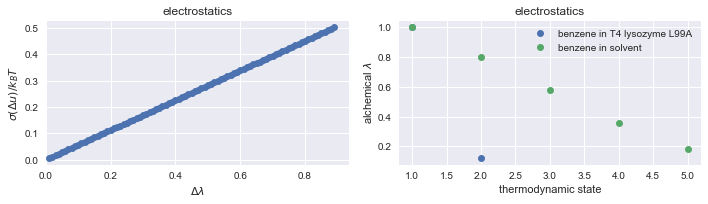

In [6]:
state_parameter = 'lambda_electrostatics'
[phase1_lambda, phase1_nlambda] = extract_lambda_values(phase1, state_parameter=state_parameter)
[phase2_lambda, phase2_nlambda] = extract_lambda_values(phase2, state_parameter=state_parameter)
[phase1_dlambda, phase1_stddev] = extract_du_stddev(phase1, state_parameter=state_parameter)
[phase2_dlambda, phase2_stddev] = extract_du_stddev(phase2, state_parameter=state_parameter)

# Plot data
figure = plt.figure(figsize=[10,3])
plt.subplot(1,2,1);
plt.plot(phase1_dlambda, phase1_stddev, 'o');
plt.xlabel('$\Delta \lambda$');
plt.ylabel('$\sigma(\Delta u) / k_BT$');
plt.title('electrostatics')
plt.gca().set_xlim(left=0)

plt.subplot(1,2,2);
plt.plot(range(1, phase1_nlambda+1), phase1_lambda, 'o')
plt.plot(range(1, phase2_nlambda+1), phase2_lambda, 'o')
plt.xlabel('thermodynamic state')
plt.ylabel('alchemical $\lambda$');
plt.legend(['%s in T4 lysozyme L99A' % ligname, '%s in solvent' % ligname]);
plt.title('electrostatics')

plt.tight_layout()
plt.savefig('thermodynamic-protocol-electrostatics.pdf')

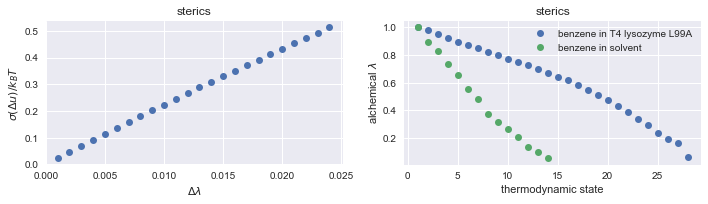

In [7]:
state_parameter = 'lambda_sterics'
[phase1_lambda, phase1_nlambda] = extract_lambda_values(phase1, state_parameter=state_parameter)
[phase2_lambda, phase2_nlambda] = extract_lambda_values(phase2, state_parameter=state_parameter)
[phase1_dlambda, phase1_stddev] = extract_du_stddev(phase1, state_parameter=state_parameter)
[phase2_dlambda, phase2_stddev] = extract_du_stddev(phase2, state_parameter=state_parameter)

# Plot data
figure = plt.figure(figsize=[10,3])
plt.subplot(1,2,1);
plt.plot(phase1_dlambda, phase1_stddev, 'o');
plt.xlabel('$\Delta \lambda$');
plt.ylabel('$\sigma(\Delta u) / k_BT$');
plt.title('sterics')
plt.gca().set_xlim(left=0)

plt.subplot(1,2,2);
plt.plot(range(1, phase1_nlambda+1), phase1_lambda, 'o')
plt.plot(range(1, phase2_nlambda+1), phase2_lambda, 'o')
plt.xlabel('thermodynamic state')
plt.ylabel('alchemical $\lambda$');
plt.legend(['%s in T4 lysozyme L99A' % ligname, '%s in solvent' % ligname]);
plt.title('sterics')

plt.tight_layout()
plt.savefig('thermodynamic-protocol-sterics.pdf')